# Module 6 

## 1.Load dataset

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv(data)

In [16]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,0.0,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,0.0,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## 2. Prepare Dataset

In [20]:
df.nunique()

engine_displacement      36
num_cylinders            14
horsepower              193
vehicle_weight         9704
acceleration            163
model_year               24
origin                    3
fuel_type                 2
drivetrain                2
num_doors                 9
fuel_efficiency_mpg    9704
dtype: int64

In [17]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [12]:
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [11]:
df = df.fillna(0)

In [14]:
df_fulltrain, df_test = train_test_split(df,           test_size=0.2, random_state=1)
df_train,     df_val  = train_test_split(df_fulltrain, test_size=0.25,random_state=1)

In [21]:
df_train= df_train.reset_index(drop=True)
df_val  = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
y_train= df_train['fuel_efficiency_mpg'].values
y_val  = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

In [25]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [29]:
train_dicts= df_train.to_dict(orient='records')
val_dicts  = df_val.to_dict(orient='records')
dv = DictVectorizer(sparse=False)

In [31]:
X_train = dv.fit_transform(train_dicts)
X_val   = dv.transform(val_dicts)

## 3.Decision Tree

In [73]:
dt = DecisionTreeRegressor(max_depth=1)

In [74]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [75]:
export_text(dt, feature_names=list(dv.get_feature_names_out()))

'|--- vehicle_weight <= 3022.11\n|   |--- value: [16.88]\n|--- vehicle_weight >  3022.11\n|   |--- value: [12.94]\n'

In [76]:
y_pred = dt.predict(X_val)

In [98]:
error = np.sqrt(mean_squared_error(y_val,y_pred))

In [99]:
error

np.float64(0.4570712602619733)

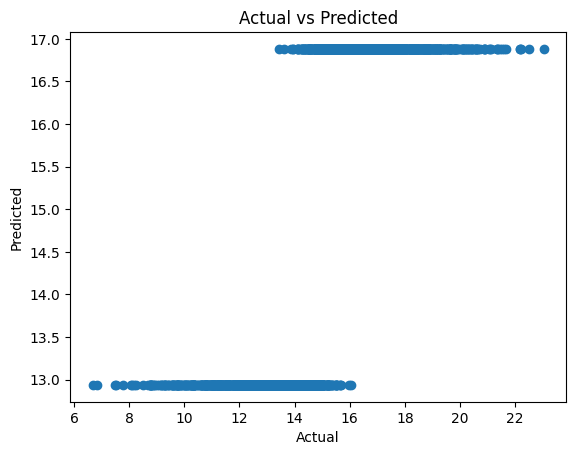

In [79]:
plt.scatter(y_val, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

## 4.Random forest

In [86]:
rf = RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)

In [87]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [91]:
y_pred = rf.predict(X_val)

In [97]:
error = np.sqrt(mean_squared_error(y_val,y_pred))
error

np.float64(0.4570712602619733)

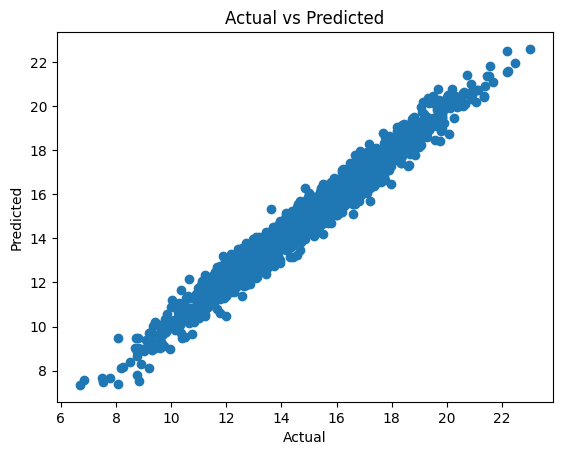

In [93]:
plt.scatter(y_val, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()